In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"/Users/yeji/SWING 2023 해커톤 with LONDON/전처리데이터")
비염대기_df = pd.read_csv("비염+대기오염지수.csv", engine="python")

In [2]:
비염대기_df

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,0,1195,26,63,0.8,0.008,0.05,0.007
1,201001,서울특별시,강남구,1,1252,26,63,0.8,0.008,0.05,0.007
2,201001,서울특별시,강남구,2,1382,26,63,0.8,0.008,0.05,0.007
3,201001,서울특별시,강남구,3,8087,26,63,0.8,0.008,0.05,0.007
4,201001,서울특별시,강남구,4,4761,26,63,0.8,0.008,0.05,0.007
...,...,...,...,...,...,...,...,...,...,...,...
21595,202112,서울특별시,강동구,1,1315,24,42,0.5,0.011,0.03,0.003
21596,202112,서울특별시,강동구,2,730,24,42,0.5,0.011,0.03,0.003
21597,202112,서울특별시,강동구,3,3964,24,42,0.5,0.011,0.03,0.003
21598,202112,서울특별시,강동구,4,2822,24,42,0.5,0.011,0.03,0.003


# 전체 연령대 비염과 대기오염지수의 상관관계

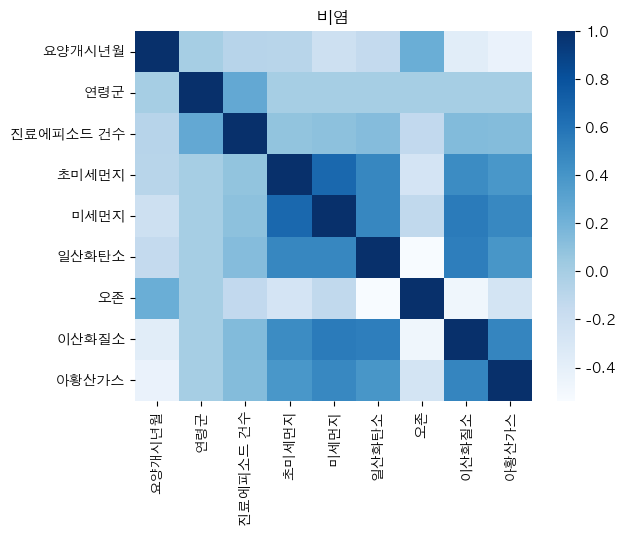

In [6]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = 비염대기_df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [7]:
cor_target_abs0 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs0)

진료에피소드 건수    1.000000
연령군          0.268376
이산화질소        0.141139
아황산가스        0.134937
일산화탄소        0.133359
오존           0.132103
미세먼지         0.102924
초미세먼지        0.081176
요양개시년월       0.079347
Name: 진료에피소드 건수, dtype: float64


## 연령군 0

In [3]:
df_0 = 비염대기_df.query('연령군 == 0')

In [4]:
df_0

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,0,1195,26,63,0.8,0.008,0.050,0.007
6,201001,서울특별시,강동구,0,1172,27,49,0.5,0.010,0.040,0.010
12,201001,서울특별시,강북구,0,565,22,54,0.9,0.015,0.049,0.010
18,201001,서울특별시,강서구,0,1719,27,62,0.8,0.010,0.048,0.009
24,201001,서울특별시,관악구,0,1104,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21570,202112,서울특별시,관악구,0,572,22,36,0.7,0.012,0.035,0.003
21576,202112,서울특별시,서초구,0,768,23,36,0.5,0.015,0.031,0.003
21582,202112,서울특별시,강남구,0,867,20,36,0.5,0.014,0.029,0.003
21588,202112,서울특별시,송파구,0,1630,22,38,0.6,0.012,0.034,0.004


In [5]:
df_0 = df_0.drop(['연령군'], axis=1)

In [6]:
df_0

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,1195,26,63,0.8,0.008,0.050,0.007
6,201001,서울특별시,강동구,1172,27,49,0.5,0.010,0.040,0.010
12,201001,서울특별시,강북구,565,22,54,0.9,0.015,0.049,0.010
18,201001,서울특별시,강서구,1719,27,62,0.8,0.010,0.048,0.009
24,201001,서울특별시,관악구,1104,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21570,202112,서울특별시,관악구,572,22,36,0.7,0.012,0.035,0.003
21576,202112,서울특별시,서초구,768,23,36,0.5,0.015,0.031,0.003
21582,202112,서울특별시,강남구,867,20,36,0.5,0.014,0.029,0.003
21588,202112,서울특별시,송파구,1630,22,38,0.6,0.012,0.034,0.004


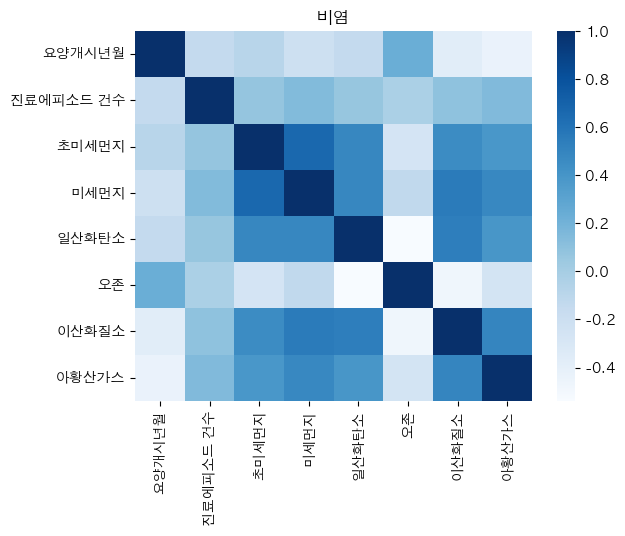

In [7]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_0.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [8]:
cor_target_abs0 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs0)

진료에피소드 건수    1.000000
아황산가스        0.149481
요양개시년월       0.144524
미세먼지         0.140782
이산화질소        0.094929
초미세먼지        0.070930
일산화탄소        0.063191
오존           0.026171
Name: 진료에피소드 건수, dtype: float64


## 연령군 1

In [9]:
df_1 = 비염대기_df.query('연령군 == 1')
df_1

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
1,201001,서울특별시,강남구,1,1252,26,63,0.8,0.008,0.050,0.007
7,201001,서울특별시,강동구,1,1089,27,49,0.5,0.010,0.040,0.010
13,201001,서울특별시,강북구,1,559,22,54,0.9,0.015,0.049,0.010
19,201001,서울특별시,강서구,1,1615,27,62,0.8,0.010,0.048,0.009
25,201001,서울특별시,관악구,1,1082,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21571,202112,서울특별시,관악구,1,707,22,36,0.7,0.012,0.035,0.003
21577,202112,서울특별시,서초구,1,982,23,36,0.5,0.015,0.031,0.003
21583,202112,서울특별시,강남구,1,1196,20,36,0.5,0.014,0.029,0.003
21589,202112,서울특별시,송파구,1,1588,22,38,0.6,0.012,0.034,0.004


In [10]:
df_1 = df_1.drop(['연령군'], axis=1)

In [11]:
df_1

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
1,201001,서울특별시,강남구,1252,26,63,0.8,0.008,0.050,0.007
7,201001,서울특별시,강동구,1089,27,49,0.5,0.010,0.040,0.010
13,201001,서울특별시,강북구,559,22,54,0.9,0.015,0.049,0.010
19,201001,서울특별시,강서구,1615,27,62,0.8,0.010,0.048,0.009
25,201001,서울특별시,관악구,1082,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21571,202112,서울특별시,관악구,707,22,36,0.7,0.012,0.035,0.003
21577,202112,서울특별시,서초구,982,23,36,0.5,0.015,0.031,0.003
21583,202112,서울특별시,강남구,1196,20,36,0.5,0.014,0.029,0.003
21589,202112,서울특별시,송파구,1588,22,38,0.6,0.012,0.034,0.004


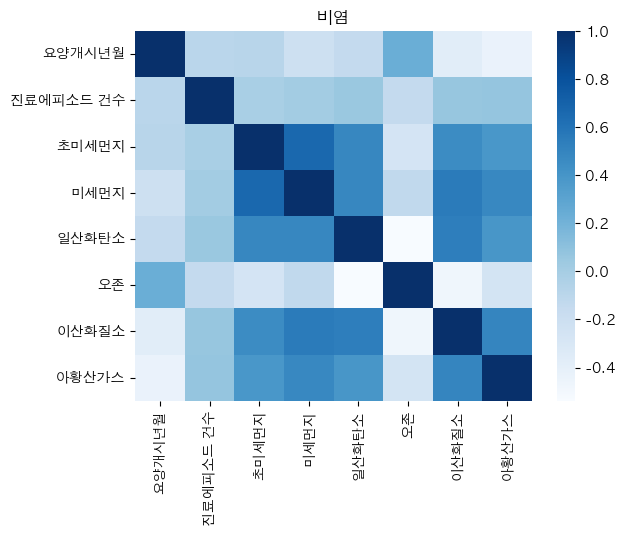

In [12]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_1.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [13]:
cor_target_abs1 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs1)

진료에피소드 건수    1.000000
오존           0.142425
요양개시년월       0.099217
아황산가스        0.071662
이산화질소        0.065485
일산화탄소        0.054801
미세먼지         0.015581
초미세먼지        0.011329
Name: 진료에피소드 건수, dtype: float64


## 연령군 2

In [14]:
df_2 = 비염대기_df.query('연령군 == 2')
df_2

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
2,201001,서울특별시,강남구,2,1382,26,63,0.8,0.008,0.050,0.007
8,201001,서울특별시,강동구,2,945,27,49,0.5,0.010,0.040,0.010
14,201001,서울특별시,강북구,2,397,22,54,0.9,0.015,0.049,0.010
20,201001,서울특별시,강서구,2,1162,27,62,0.8,0.010,0.048,0.009
26,201001,서울특별시,관악구,2,799,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21572,202112,서울특별시,관악구,2,644,22,36,0.7,0.012,0.035,0.003
21578,202112,서울특별시,서초구,2,866,23,36,0.5,0.015,0.031,0.003
21584,202112,서울특별시,강남구,2,1164,20,36,0.5,0.014,0.029,0.003
21590,202112,서울특별시,송파구,2,1208,22,38,0.6,0.012,0.034,0.004


In [15]:
df_2 = df_2.drop(['연령군'], axis=1)

In [16]:
df_2

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
2,201001,서울특별시,강남구,1382,26,63,0.8,0.008,0.050,0.007
8,201001,서울특별시,강동구,945,27,49,0.5,0.010,0.040,0.010
14,201001,서울특별시,강북구,397,22,54,0.9,0.015,0.049,0.010
20,201001,서울특별시,강서구,1162,27,62,0.8,0.010,0.048,0.009
26,201001,서울특별시,관악구,799,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21572,202112,서울특별시,관악구,644,22,36,0.7,0.012,0.035,0.003
21578,202112,서울특별시,서초구,866,23,36,0.5,0.015,0.031,0.003
21584,202112,서울특별시,강남구,1164,20,36,0.5,0.014,0.029,0.003
21590,202112,서울특별시,송파구,1208,22,38,0.6,0.012,0.034,0.004


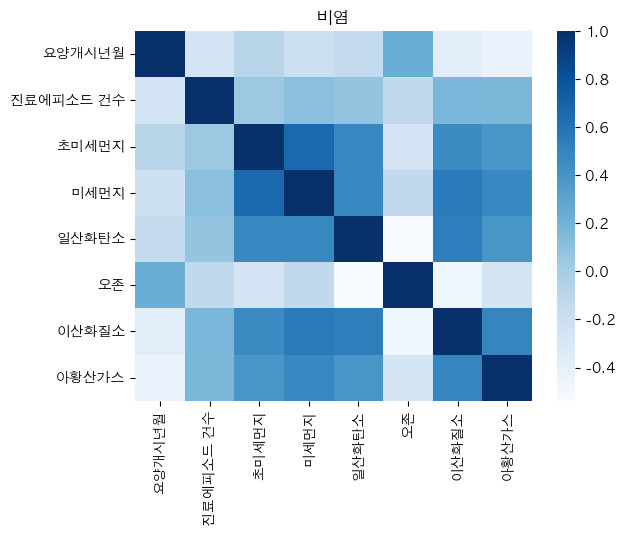

In [17]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_2.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [18]:
cor_target_abs2 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs2)

진료에피소드 건수    1.000000
요양개시년월       0.266537
이산화질소        0.173804
아황산가스        0.170114
오존           0.127016
미세먼지         0.115473
일산화탄소        0.079272
초미세먼지        0.044667
Name: 진료에피소드 건수, dtype: float64


## 연령군 3

In [19]:
df_3 = 비염대기_df.query('연령군 == 3')
df_3

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
3,201001,서울특별시,강남구,3,8087,26,63,0.8,0.008,0.050,0.007
9,201001,서울특별시,강동구,3,6437,27,49,0.5,0.010,0.040,0.010
15,201001,서울특별시,강북구,3,2681,22,54,0.9,0.015,0.049,0.010
21,201001,서울특별시,강서구,3,8318,27,62,0.8,0.010,0.048,0.009
27,201001,서울특별시,관악구,3,8442,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21573,202112,서울특별시,관악구,3,4840,22,36,0.7,0.012,0.035,0.003
21579,202112,서울특별시,서초구,3,2790,23,36,0.5,0.015,0.031,0.003
21585,202112,서울특별시,강남구,3,3891,20,36,0.5,0.014,0.029,0.003
21591,202112,서울특별시,송파구,3,5465,22,38,0.6,0.012,0.034,0.004


In [20]:
df_3 = df_3.drop(['연령군'], axis=1)

In [21]:
df_3

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
3,201001,서울특별시,강남구,8087,26,63,0.8,0.008,0.050,0.007
9,201001,서울특별시,강동구,6437,27,49,0.5,0.010,0.040,0.010
15,201001,서울특별시,강북구,2681,22,54,0.9,0.015,0.049,0.010
21,201001,서울특별시,강서구,8318,27,62,0.8,0.010,0.048,0.009
27,201001,서울특별시,관악구,8442,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21573,202112,서울특별시,관악구,4840,22,36,0.7,0.012,0.035,0.003
21579,202112,서울특별시,서초구,2790,23,36,0.5,0.015,0.031,0.003
21585,202112,서울특별시,강남구,3891,20,36,0.5,0.014,0.029,0.003
21591,202112,서울특별시,송파구,5465,22,38,0.6,0.012,0.034,0.004


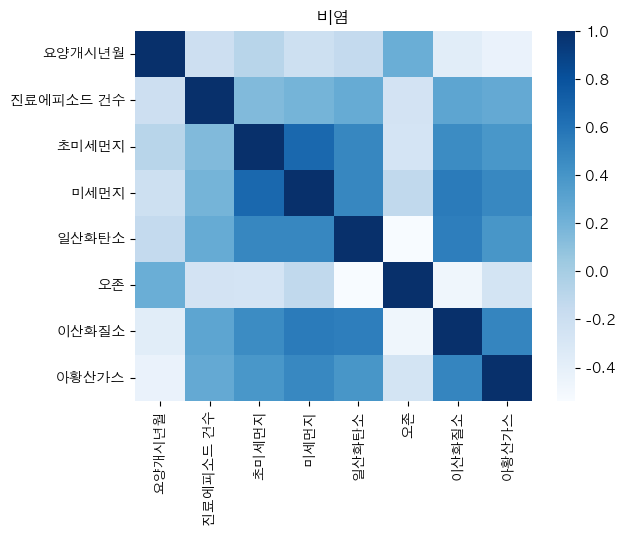

In [22]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_3.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [23]:
cor_target_abs3 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs3)

진료에피소드 건수    1.000000
이산화질소        0.290937
아황산가스        0.265492
오존           0.252469
일산화탄소        0.252281
요양개시년월       0.207441
미세먼지         0.192279
초미세먼지        0.147605
Name: 진료에피소드 건수, dtype: float64


## 연령군 4

In [24]:
df_4 = 비염대기_df.query('연령군 == 4')
df_4

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
4,201001,서울특별시,강남구,4,4761,26,63,0.8,0.008,0.050,0.007
10,201001,서울특별시,강동구,4,4446,27,49,0.5,0.010,0.040,0.010
16,201001,서울특별시,강북구,4,1833,22,54,0.9,0.015,0.049,0.010
22,201001,서울특별시,강서구,4,5299,27,62,0.8,0.010,0.048,0.009
28,201001,서울특별시,관악구,4,4772,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21574,202112,서울특별시,관악구,4,2760,22,36,0.7,0.012,0.035,0.003
21580,202112,서울특별시,서초구,4,2130,23,36,0.5,0.015,0.031,0.003
21586,202112,서울특별시,강남구,4,2844,20,36,0.5,0.014,0.029,0.003
21592,202112,서울특별시,송파구,4,4075,22,38,0.6,0.012,0.034,0.004


In [25]:
df_4 = df_4.drop(['연령군'], axis=1)

In [26]:
df_4

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
4,201001,서울특별시,강남구,4761,26,63,0.8,0.008,0.050,0.007
10,201001,서울특별시,강동구,4446,27,49,0.5,0.010,0.040,0.010
16,201001,서울특별시,강북구,1833,22,54,0.9,0.015,0.049,0.010
22,201001,서울특별시,강서구,5299,27,62,0.8,0.010,0.048,0.009
28,201001,서울특별시,관악구,4772,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21574,202112,서울특별시,관악구,2760,22,36,0.7,0.012,0.035,0.003
21580,202112,서울특별시,서초구,2130,23,36,0.5,0.015,0.031,0.003
21586,202112,서울특별시,강남구,2844,20,36,0.5,0.014,0.029,0.003
21592,202112,서울특별시,송파구,4075,22,38,0.6,0.012,0.034,0.004


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 문자열이 포함된 특징('주소') 제외하기
df_no_object = df_4.drop(['주소(시도)', '주소(시군구)', '요양개시년월'], axis=1)

print(df_no_object)
# 데이터 분리 ('Life expectancy'를 제외한 특징들을 입력 변수로 정의함.) 
X_train, X_test, y_train, y_test = train_test_split(df_no_object.loc[:, df_no_object.columns !='진료에피소드 건수'], df_no_object['진료에피소드 건수'], test_size=.33, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# r2 score 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('r2 score :' + str(r2))

       진료에피소드 건수  초미세먼지  미세먼지  일산화탄소     오존  이산화질소  아황산가스
4           4761     26    63    0.8  0.008  0.050  0.007
10          4446     27    49    0.5  0.010  0.040  0.010
16          1833     22    54    0.9  0.015  0.049  0.010
22          5299     27    62    0.8  0.010  0.048  0.009
28          4772     19    64    0.9  0.009  0.044  0.006
...          ...    ...   ...    ...    ...    ...    ...
21574       2760     22    36    0.7  0.012  0.035  0.003
21580       2130     23    36    0.5  0.015  0.031  0.003
21586       2844     20    36    0.5  0.014  0.029  0.003
21592       4075     22    38    0.6  0.012  0.034  0.004
21598       2822     24    42    0.5  0.011  0.030  0.003

[3600 rows x 7 columns]
r2 score :0.16592359013116842


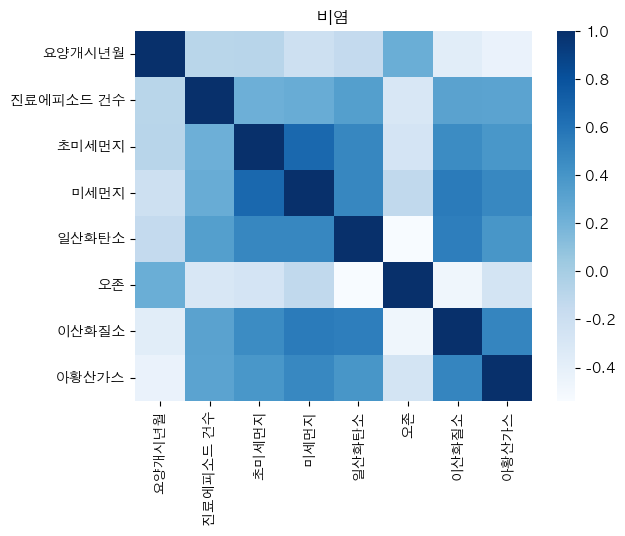

In [27]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_4.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [28]:
cor_target_abs4 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs4)

진료에피소드 건수    1.000000
일산화탄소        0.334672
이산화질소        0.314771
아황산가스        0.306398
오존           0.292928
미세먼지         0.248738
초미세먼지        0.220102
요양개시년월       0.092205
Name: 진료에피소드 건수, dtype: float64


## 연령군 5

In [29]:
df_5 = 비염대기_df.query('연령군 == 5')
df_5

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
5,201001,서울특별시,강남구,5,1609,26,63,0.8,0.008,0.050,0.007
11,201001,서울특별시,강동구,5,1307,27,49,0.5,0.010,0.040,0.010
17,201001,서울특별시,강북구,5,869,22,54,0.9,0.015,0.049,0.010
23,201001,서울특별시,강서구,5,1687,27,62,0.8,0.010,0.048,0.009
29,201001,서울특별시,관악구,5,2023,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21575,202112,서울특별시,관악구,5,2130,22,36,0.7,0.012,0.035,0.003
21581,202112,서울특별시,서초구,5,1260,23,36,0.5,0.015,0.031,0.003
21587,202112,서울특별시,강남구,5,1753,20,36,0.5,0.014,0.029,0.003
21593,202112,서울특별시,송파구,5,2659,22,38,0.6,0.012,0.034,0.004


In [30]:
df_5 = df_5.drop(['연령군'], axis=1)

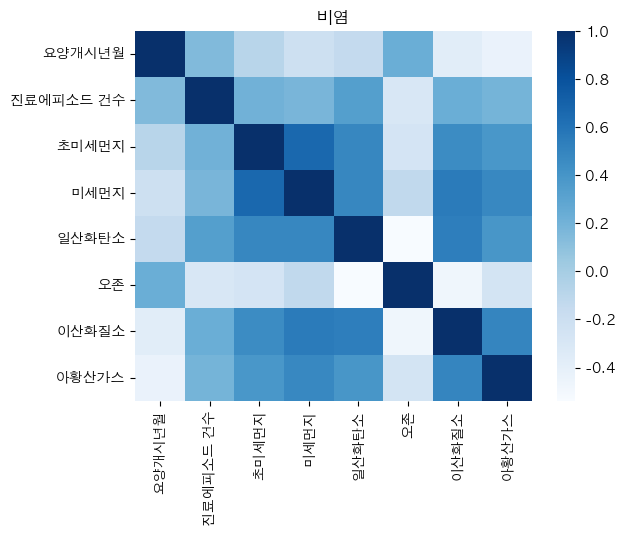

In [31]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_5.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [32]:
cor_target_abs5 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs5)

진료에피소드 건수    1.000000
일산화탄소        0.334790
오존           0.297935
이산화질소        0.233068
초미세먼지        0.211266
아황산가스        0.192263
미세먼지         0.182405
요양개시년월       0.152388
Name: 진료에피소드 건수, dtype: float64


2020,2021년 데이터 제거

In [10]:
!pip install -U scikit-learn

In [12]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
index = 비염대기_df[비염대기_df['요양개시년월'] >= 202001].index

In [21]:
print(index)

Index([18000, 18001, 18002, 18003, 18004, 18005, 18006, 18007, 18008, 18009,
       ...
       21590, 21591, 21592, 21593, 21594, 21595, 21596, 21597, 21598, 21599],
      dtype='int64', length=3600)


In [22]:
df_2019 = 비염대기_df.drop(index)

In [23]:
df_2019

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,0,1195,26,63,0.8,0.008,0.050,0.007
1,201001,서울특별시,강남구,1,1252,26,63,0.8,0.008,0.050,0.007
2,201001,서울특별시,강남구,2,1382,26,63,0.8,0.008,0.050,0.007
3,201001,서울특별시,강남구,3,8087,26,63,0.8,0.008,0.050,0.007
4,201001,서울특별시,강남구,4,4761,26,63,0.8,0.008,0.050,0.007
...,...,...,...,...,...,...,...,...,...,...,...
17995,201912,서울특별시,강동구,1,2035,36,48,0.6,0.009,0.036,0.003
17996,201912,서울특별시,강동구,2,1632,36,48,0.6,0.009,0.036,0.003
17997,201912,서울특별시,강동구,3,7962,36,48,0.6,0.009,0.036,0.003
17998,201912,서울특별시,강동구,4,5905,36,48,0.6,0.009,0.036,0.003


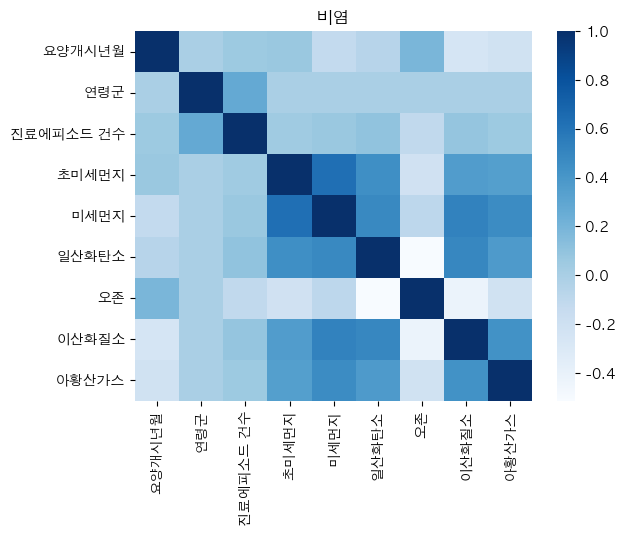

In [26]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_2019.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [27]:
cor_target_abs2 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs2)

진료에피소드 건수    1.000000
연령군          0.278278
오존           0.107929
일산화탄소        0.105433
이산화질소        0.083503
미세먼지         0.070112
아황산가스        0.058304
요양개시년월       0.057831
초미세먼지        0.044626
Name: 진료에피소드 건수, dtype: float64


In [28]:
비염대기_df

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,0,1195,26,63,0.8,0.008,0.05,0.007
1,201001,서울특별시,강남구,1,1252,26,63,0.8,0.008,0.05,0.007
2,201001,서울특별시,강남구,2,1382,26,63,0.8,0.008,0.05,0.007
3,201001,서울특별시,강남구,3,8087,26,63,0.8,0.008,0.05,0.007
4,201001,서울특별시,강남구,4,4761,26,63,0.8,0.008,0.05,0.007
...,...,...,...,...,...,...,...,...,...,...,...
21595,202112,서울특별시,강동구,1,1315,24,42,0.5,0.011,0.03,0.003
21596,202112,서울특별시,강동구,2,730,24,42,0.5,0.011,0.03,0.003
21597,202112,서울특별시,강동구,3,3964,24,42,0.5,0.011,0.03,0.003
21598,202112,서울특별시,강동구,4,2822,24,42,0.5,0.011,0.03,0.003


In [29]:
cols = ['요양개시년월', '주소(시도)', '주소(시군구)', '연령군', '진료에피소드 건수', '초미세먼지', '미세먼지', '일산화탄소', '오존', '이산화질소', '아황산가스']

min max scaling

In [41]:
cols = ['요양개시년월','연령군', '진료에피소드 건수', '초미세먼지', '미세먼지', '일산화탄소', '오존', '이산화질소', '아황산가스']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

비염대기_df[cols] = scaler.fit_transform(비염대기_df[cols])
# print(out_scaled)

비염대기_df

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,0.0,서울특별시,강남구,0.0,0.076734,0.42,0.213115,0.636364,0.0625,0.836364,0.6
1,0.0,서울특별시,강남구,0.2,0.080518,0.42,0.213115,0.636364,0.0625,0.836364,0.6
2,0.0,서울특별시,강남구,0.4,0.089147,0.42,0.213115,0.636364,0.0625,0.836364,0.6
3,0.0,서울특별시,강남구,0.6,0.534218,0.42,0.213115,0.636364,0.0625,0.836364,0.6
4,0.0,서울특별시,강남구,0.8,0.313442,0.42,0.213115,0.636364,0.0625,0.836364,0.6
...,...,...,...,...,...,...,...,...,...,...,...
21595,1.0,서울특별시,강동구,0.2,0.084700,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21596,1.0,서울특별시,강동구,0.4,0.045868,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21597,1.0,서울특별시,강동구,0.6,0.260538,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21598,1.0,서울특별시,강동구,0.8,0.184733,0.38,0.127049,0.363636,0.1250,0.472727,0.2


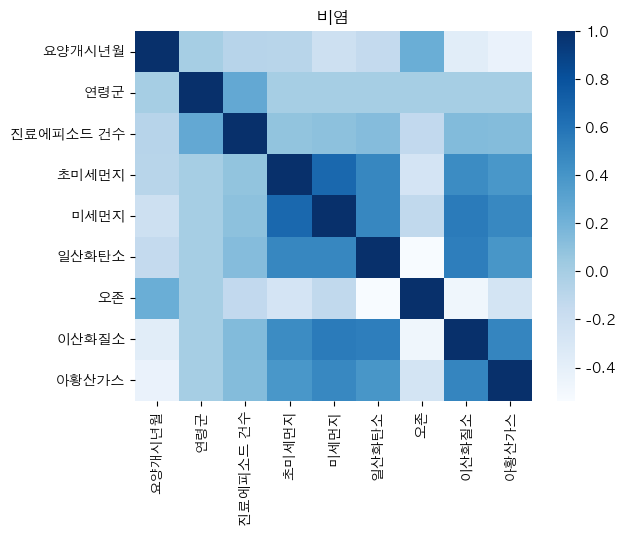

In [42]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = 비염대기_df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [40]:
비염대기_df

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,0.0,서울특별시,강남구,0.0,0.076734,0.42,0.213115,0.636364,0.0625,0.836364,0.6
1,0.0,서울특별시,강남구,0.2,0.080518,0.42,0.213115,0.636364,0.0625,0.836364,0.6
2,0.0,서울특별시,강남구,0.4,0.089147,0.42,0.213115,0.636364,0.0625,0.836364,0.6
3,0.0,서울특별시,강남구,0.6,0.534218,0.42,0.213115,0.636364,0.0625,0.836364,0.6
4,0.0,서울특별시,강남구,0.8,0.313442,0.42,0.213115,0.636364,0.0625,0.836364,0.6
...,...,...,...,...,...,...,...,...,...,...,...
21595,1.0,서울특별시,강동구,0.2,0.084700,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21596,1.0,서울특별시,강동구,0.4,0.045868,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21597,1.0,서울특별시,강동구,0.6,0.260538,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21598,1.0,서울특별시,강동구,0.8,0.184733,0.38,0.127049,0.363636,0.1250,0.472727,0.2


In [43]:
cor_target_abs2 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs2)

진료에피소드 건수    1.000000
연령군          0.268376
이산화질소        0.141139
아황산가스        0.134937
일산화탄소        0.133359
오존           0.132103
미세먼지         0.102924
초미세먼지        0.081176
요양개시년월       0.079347
Name: 진료에피소드 건수, dtype: float64
